# Introduction

I have been interested in the plight of honey bees since first learning about Colony
Collapse Disorder, the term given to the mysterious cause of bees dissapearing
from colonies en masse leading to the colony's demise. Given the importance of bees
to the pollination of many major US crops (canola, almonds, oranges, and more) any
threat to the health of bees is a reason for concern, but the unknown cause of Colony
Collapse Disorder makes the problem all the more darkly interesting.

For this reason I was drawn to this dataset, the annual production of honey in the
US, when I was searching for a project for this first blog entry. I was curious to
see what can be learned about bees and their species health through the honey they
produce. As a result, I dug a little deeper into it this dataset than I had
originally intended. Therefore, this is part one of a to-be-determined number of
posts on US honey production.

# About the data set
This project focuses on the production and price of US honey from 1998-2012. The
dataset was downloaded from [here](https://www.kaggle.com/jessicali9530/honey-production),
and represents a subset of the Department Of Agriculture’s National Agricultural
Statistics Service Annual Honey Report. More information about the US honey industry,
including details about this dataset and supplemental information I am not
considering in this project, can be found [here.](http://www.beeculture.com/u-s-honey-industry-report-2016/) 

The dataset is organized by state and year for the following features: 
- numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. Honey taken from colonies which did not survive the entire year is included.
- yieldpercol: Honey yield per colony. Unit is pounds.
- totalprod: the total amount of honey in pounds produced in that state for the year, which is the product of the previous two features (numcol x yieldpercol). Unit is pounds.
- stocks: the amount of honey in pounds that is held in reserve by producers and not sold that year. Unit is pounds.
- priceperlb: average price per pound. Unit is dollars.
- prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.
- Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. The honey produced by those states can be added, but it is a small fraction of the total and can be safely left out. Due to rounding, total colonies multiplied by total yield may not equal production. 

# Goals

For part one of this project, my primary goal is to identify the general trends in
the production of US honey. In particular, I am interested in answering the following
questions: What determines the price of honey? How has US honey production changed
from 1998-2012?  How has the Colony Collapse Disorder impacted both the production
and price of honey? Which states produce the most honey and how has that production
changed? Further, are there any other trends noticeable in the data that are relevant
for understanding how honey is produced and how the price is set? (Spoiler: yes, there are!)

# Analysis

In [1]:
#Import relevant libraries, set my plotting environements:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from scipy import stats
%matplotlib inline
sns.set()
plt.rcParams["patch.force_edgecolor"] = True

Import the dataset, take a look to see how it is formatted, and get a sample of what is in it

In [2]:
honey = pd.read_csv('honeyproduction.csv')#honey data from 1998-2012
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


The dataset came organized and formatted as shown. In a subsequent blog post I will download datasets from the source and apply my own cleaning procedure to format it in a consistent manner as above. For now, I note that there are no NaN values and the dataset is in good form for immediate analysis.

In [3]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


The features of the dataset can be divided into two parts: the supply of US honey and
its value. The main goal of this first part is to understand how that value is
derived. Since I am interested in the dataset features that relate to the price of honey, I
first wanted to look for trends in the price of honey over time. 

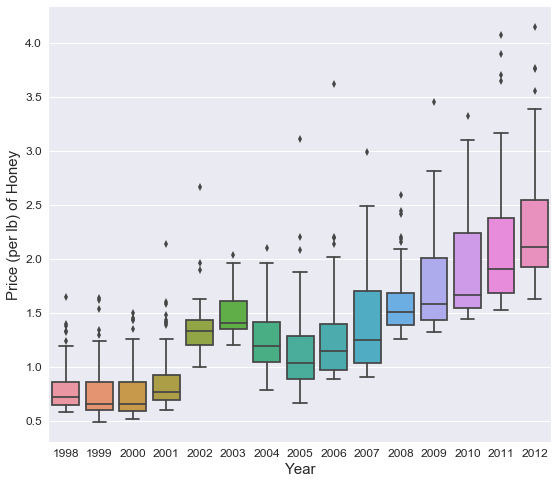

In [5]:
plt.figure(figsize=(9,8))
bp = sns.boxplot(x = 'year',y = 'priceperlb',data=honey)
bp.xaxis.set_tick_params(labelsize=12)
bp.yaxis.set_tick_params(labelsize=12)
bp.set_ylabel('Price (per lb) of Honey',fontsize=15)
bp.set_xlabel('Year',fontsize=15)
plt.savefig('PriceYear_boxplot.png')

The plot above shows the distribution of the price per pound of honey in reporting states from 1998-2012. The median price and
price distribution are both fairly constant from 1998 to 2001, establishing a
baseline for the price of honey. The Colony Collapse Disorder was first reported in 2006 which coincides with a
continual increase in the price of honey from 2006-2012. The most unexpected trend in
the plot is a brief spike in the price of honey in 2002-2004. The spike peaks in 2003
before regressing nearly to the baseline in 2005. This spike precedes the start of
the Colony Collapse Disorder in 2006 indicating that there was a separate temporary event that triggered
this trend in the price.

(The points outside the whiskers show that each year there are a few states with
unusually high prices. Since I am mostly interested in the general trends to start, I am going
to ignore these handful of points for the time being.)

Next, I want to determine if I can identify the source of the trends in the mean
price of honey in the features that describe the supply of honey.

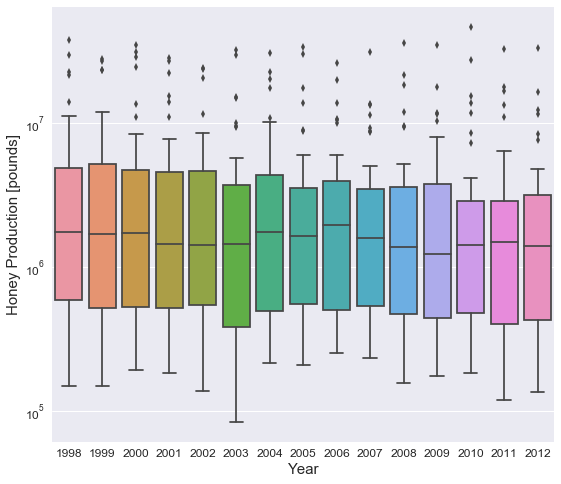

In [7]:
plt.figure(figsize=(9,8))
bp = sns.boxplot(x = 'year',y = 'totalprod',data=honey)
bp.set_yscale('log')
bp.xaxis.set_tick_params(labelsize=12)
bp.yaxis.set_tick_params(labelsize=12)
bp.set_ylabel('Honey Production [pounds]',fontsize=15)
bp.set_xlabel('Year',fontsize=15)
plt.savefig('HoneyProd_boxplot.png')

The distribution of honey production appars to remain roughly constant in 1998-2012.
However, this boxplot is hiding the importance of the few outliers states that appear
to dominate domestic honey production. In order to get a clear understanding of what is
driving the trends in the price I need to consider the total production of honey in
the US. To do this, I need to create a new dataframe which aggregates the
features into national totals (or mean values) for each year: the total production of
honey in the US, the total number of colonies that produced honey, the mean yield of
honey per colony in that year, and the mean price per pound. This is done below:

In [8]:
US_totals = pd.DataFrame(honey.groupby('year')['numcol','totalprod','stocks','prodvalue'].sum())
US_totals[['yieldpercol','priceperlb']] = honey.groupby('year')['yieldpercol','priceperlb'].mean()
US_totals = US_totals.reset_index()
US_totals.head()

,year,numcol,totalprod,stocks,prodvalue,yieldpercol,priceperlb
0,1998,2621000.0,219519000.0,80565000.0,146091000.0,69.953488,0.832558
1,1999,2637000.0,202387000.0,78390000.0,123657000.0,65.465116,0.804186
2,2000,2604000.0,219558000.0,84956000.0,131568000.0,67.581395,0.791395
3,2001,2542000.0,185748000.0,64764000.0,132282000.0,64.545455,0.911818
4,2002,2565000.0,171265000.0,39177000.0,227302000.0,66.795455,1.371364


After some experimentation with different combinations of features in the dataset, I
found the best predictor for price each year is the sum of that year's honey
prodution with the stocks from the previous year, which I am refering to as the
Market Size of US honey. This represents that amount of domestic honey that is
available for purchase in any given year. The total market
size for honey would include imported honey, which is not being considered for this
analysis, but could be considered in a future post. When considering US Market Size
we will not include the year 1998, since I do not know the honey reserved in stocks
from 1997.

In [10]:
US_totals['marketsize'] = np.nan
x = US_totals['totalprod'].iloc[1:].values + US_totals['stocks'].iloc[:-1].values #the amount of domestic honey in
US_totals['marketsize'].iloc[1:] = x
US_totals

,year,numcol,totalprod,stocks,prodvalue,yieldpercol,priceperlb,marketsize
0,1998,2621000.0,219519000.0,80565000.0,146091000.0,69.953488,0.832558,NaN
1,1999,2637000.0,202387000.0,78390000.0,123657000.0,65.465116,0.804186,282952000.0
2,2000,2604000.0,219558000.0,84956000.0,131568000.0,67.581395,0.791395,297948000.0
3,2001,2542000.0,185748000.0,64764000.0,132282000.0,64.545455,0.911818,270704000.0
4,2002,2565000.0,171265000.0,39177000.0,227302000.0,66.795455,1.371364,236029000.0
5,2003,2591000.0,181372000.0,40619000.0,252079000.0,62.545455,1.494773,220549000.0
6,2004,2539000.0,182729000.0,60981000.0,197307000.0,64.804878,1.284634,223348000.0
7,2005,2394000.0,173969000.0,62187000.0,160793000.0,64.268293,1.195122,234950000.0
8,2006,2378000.0,154238000.0,60235000.0,157924000.0,61.853659,1.303659,216425000.0
9,2007,2428000.0,147621000.0,52405000.0,161356000.0,59.170732,1.438293,207856000.0


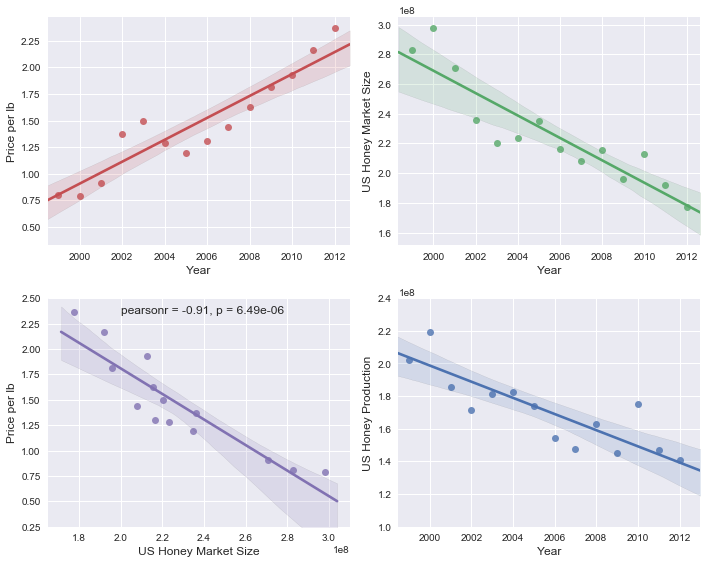

In [11]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 8))
sns.regplot(x='year',y='totalprod',data=US_totals,ax=ax[1,1])
sns.regplot(x='year',y='marketsize',data=US_totals,ax=ax[0,1])
sns.regplot(x='year',y='priceperlb',data=US_totals,ax=ax[0,0])
sns.regplot(x='marketsize',y='priceperlb',data=US_totals,ax=ax[1,0])

r,p = stats.pearsonr(US_totals['marketsize'].iloc[1:],US_totals['priceperlb'].iloc[1:])
ax[1,0].annotate("pearsonr = {:.2f}, p = {:.2e}".format(r,p),xy=(2e8,2.35))
ax[1,0].set_xlim(1.65e8,3.1e8)
ax[1,0].set_ylim(0.25,2.5)
ax[1,1].set_ylim(1.e8,2.4e8)

ax[1,1].set_ylabel('US Honey Production',fontsize=12)
ax[1,1].set_xlabel('Year',fontsize=12)
ax[1,1].set_xlim(1998.5,2013)
ax[0,0].set_ylabel('Price per lb',fontsize=12)
ax[0,0].set_xlabel('Year',fontsize=12)
ax[0,0].set_xlim(1998.5,)
ax[0,1].set_ylabel('US Honey Market Size',fontsize=12)
ax[0,1].set_xlabel('Year',fontsize=12)
ax[1,0].set_ylabel('Price per lb',fontsize=12)
ax[1,0].set_xlabel('US Honey Market Size',fontsize=12)
plt.tight_layout()
plt.savefig('US_tot.png')

The mean price of honey in the US is steadily rising from 1998-2012 as shown in the
top left panel in the figure above. This is related to the continuous descrease in
the domestic market size of honey which is shown in the top right panel. The linear
relationship between market size and price is shown in the bottom left panel where
the strong statistical significance of the linear fit is annotated on the plot. The
Pearson correlation coefficient ("pearsonr" in the plot) of the two features is close
to -1 indicating the the mean price of honey and the domestic market size each year
are nearly linearly related. Further, the p-value of the linear relationship between
the two is far less than 0.05, which shows a strong significance for the rejection of
the null hypothesis that they are not linearly related. The correlation between
market size and price naively makes sense as a decrease in the supply of honey,
assuming a constant demand, should result in an increase in price.

Although not shown above, the honey produced per year is also correlated with the
price of honey. This is not suprising since a majority of the market size comes from
that year's production. Comparing the two panels in the right column shows the trends
of these two features are very similar.

It is worth noting that the linear fit to the price of honey over time does a poor
job describing changes in the price on small timescales. I illustrate that further in the
plot below where, despite a small number of points, there are clear variations in the
price with respect to the linear regression. As disucssed above, the changes in the price of honey
can be broken into three periods: a linear increase from 2005-2012 due to a linear
decrease in market size likely triggered by the colony collapse disorder, a roughly constant
price from 1999-2001 when the market size was also roughly constant, and a temporary
peak in the price from 2002-2004 when the market size temporarily dipped.

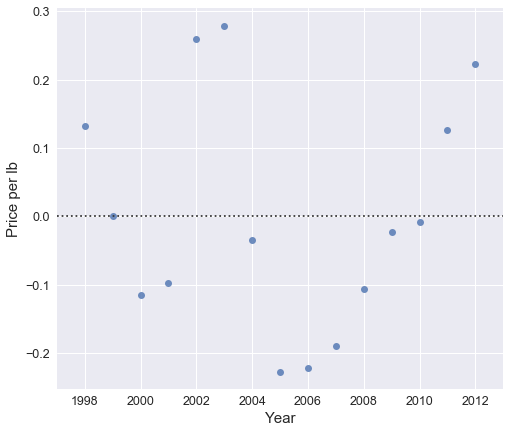

In [14]:
fig,ax = plt.subplots(figsize=(8,7))
sns.set_context("notebook",font_scale=1.25)
sns.residplot(x='year',y='priceperlb',data=US_totals)
ax.set_ylabel('Price per lb',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.set_xlim(1997,2013)
plt.savefig('USprice_resid.png')

I now know that the price of honey is set based on the market size of honey. Why is
the market size decreasing over the full time period I am considering here and what
is causing the variations on short timescales? In order to answer that question I
need to examine the three features that make up the market size. The yearly market
size of honey is the product of the number of honey producing colonies and the yield
of those colonies summed with the amount of honey in reserve stocks from the previous
year. The plot below examines how these features evolve from 1998-2012.

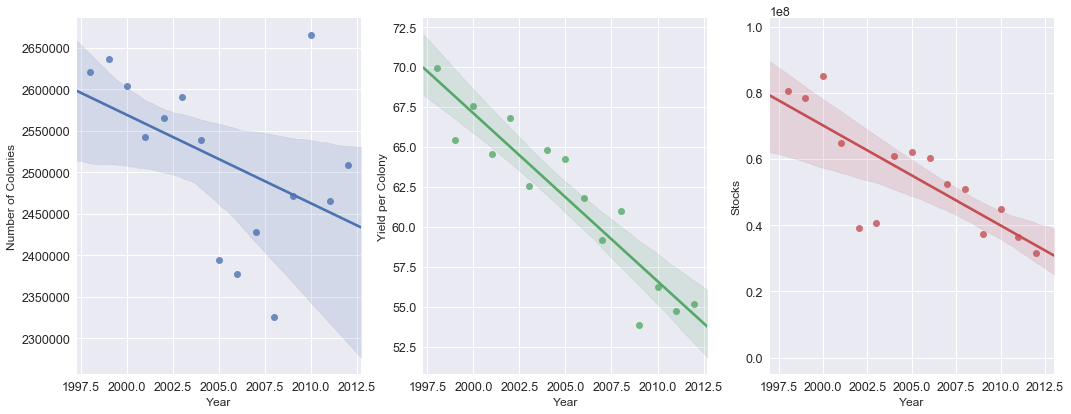

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 6))
sns.regplot(x='year',y='numcol',data=US_totals,ax=ax1)
sns.regplot(x='year',y='yieldpercol',data=US_totals,ax=ax2)
sns.regplot(x='year',y='stocks',data=US_totals,ax=ax3)

ax1.set_ylabel('Number of Colonies',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax2.set_ylabel('Yield per Colony',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax3.set_ylabel('Stocks',fontsize=12)
ax3.set_xlabel('Year',fontsize=12)
ax3.set_xlim(1997,2013)
plt.tight_layout()
plt.savefig('USprod_drivers.png')

Overall the average yield per colony and the total number of honey producing colonies in the United States
are both descreasing with time. Since the total domestic production is the product of these
two features, both are responsible for the decrease in US honey production. The
amount of honey held in reserve each year is approximately 20-40% of what is
produced, therefore as the domestic production of honey has decreased, so has the
amount in stocks. The combined effect of all three features descreasing with time
shows why the US honey market size has decreased over the time period we conisder.

The number of honey producing colonies was slowly declining from 1998-2004. They
precipitous drop in 2005-2008 shows how the colony collapse disorder impacted the
honey industry. Subsequent years show a possible rebound. The mean yield has
continued to drop though. The cause for that is not clear from this dataset. I also
do not see what is caused the dip in the market size from 2002-2004. In order to
understand what is driving the national trends in these two features, I need to
consider the original dataset and look into the individual states more closely.

# Summary

I have determined that the average price of US honey is correlated with the total
amount of US honey on the market that year which consists of the honey produced that
year and the honey held in reserve from the previous year. Overall the supply of
honey on the US market each year has decreased resulting in a corresponding increase
in the price. This decrease in the  domestic market size is the result of a decrease
in both the number of honey producing colonies and the average yield of honey they
produce. The Colony Collapse Disorder caused a significant drop in the number of
honey producing colonies which can explain a steady decline in the domestic market
size from 2005-2012. However, I am currently unable to determine the cause of the
short timescale dip in the US honey supply from 2002-2004.

In Part 2, I will answer the remaining questions: Which states produce the most honey
and how has that production changed? What caused the drop in the market size of honey
and related rise in price from 2002-2004?